In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
from defectlib import maybe_pickle

In [3]:
maybe_pickle('./Data/For_Andy11.24/')

100%|██████████| 6/6 [00:02<00:00,  2.22it/s]


In [4]:
defect_dict = load_tensors_all('./Data/For_Andy11.24/Test_Water_Paper/', width=128)

(137, 70, 44)
(79, 70, 44)
(67, 70, 44)
(77, 70, 44)
(36, 41, 76)
(13, 41, 76)
(10, 41, 76)
(23, 41, 76)
(11, 105, 63)
(67, 105, 63)
(72, 105, 63)
(17, 105, 63)


In [6]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 609
number of class 0: 184
	number of SN: 9
number of class 1: 159
	number of SN: 5
number of class 2: 149
	number of SN: 5
number of class 3: 117
	number of SN: 5


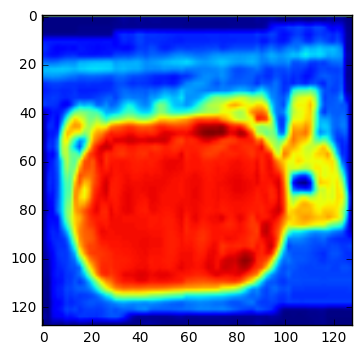

In [7]:
plt.imshow(tensors[labels == 0][0])

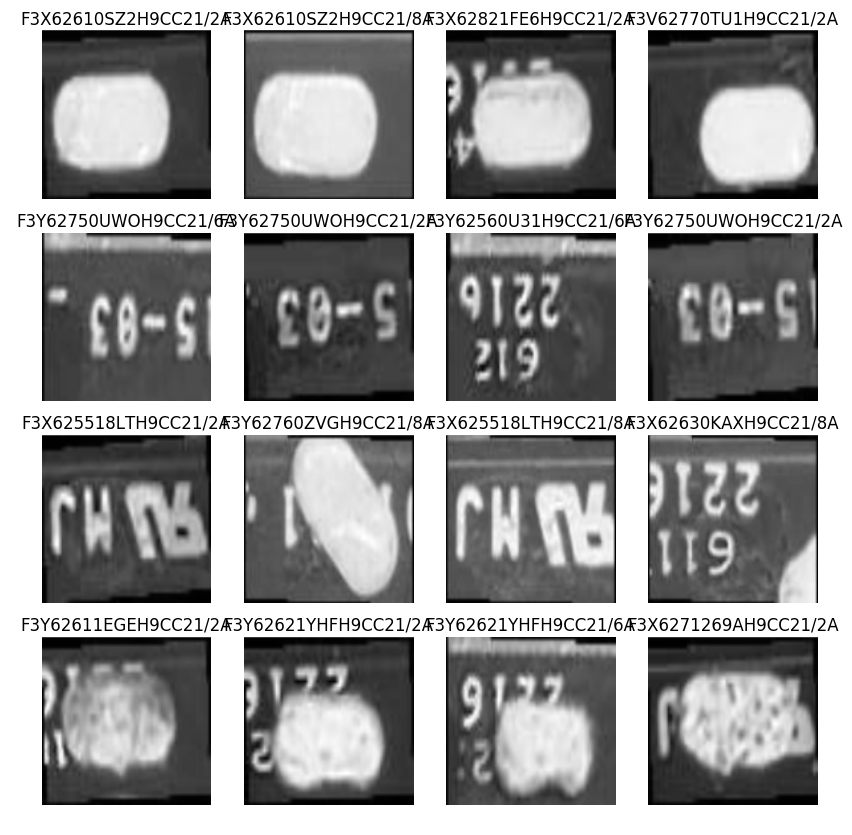

In [8]:
display_tensor(tensors, labels, sns)

In [9]:
tensors_update, labels_update, sns_update = remove_sn(tensors, labels, sns, 'F3X625518LTH9CC21')

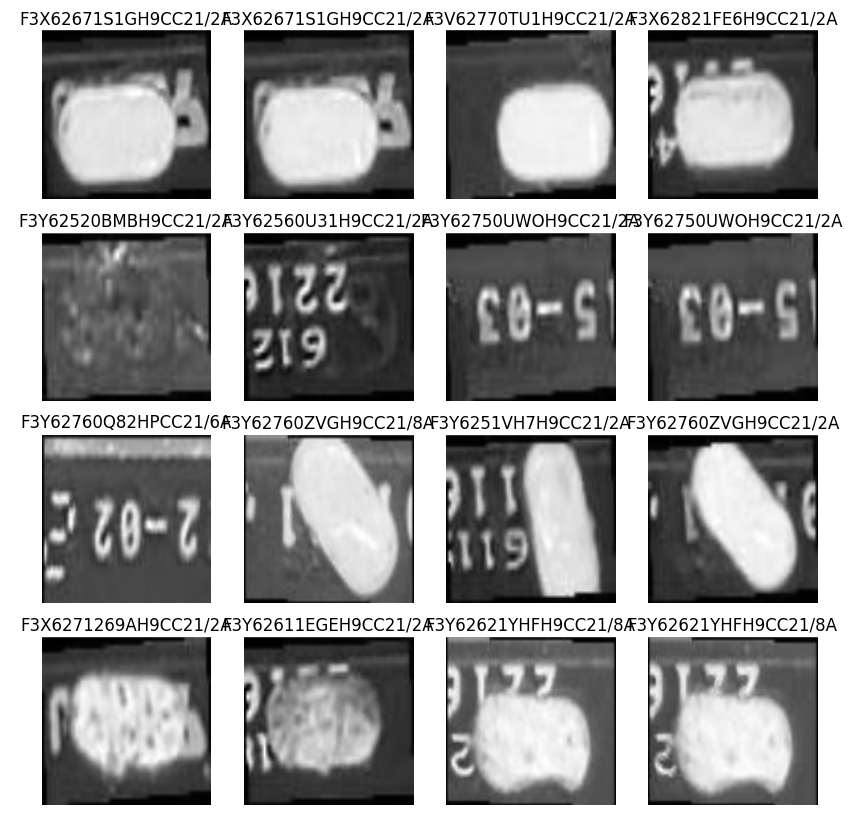

In [11]:
display_tensor(tensors_update, labels_update, sns_update)

In [12]:
tensors_update, labels_update, sns_update = remove_sn(tensors_update, labels_update, sns_update, 'F3Y62760Q82HPCC21')

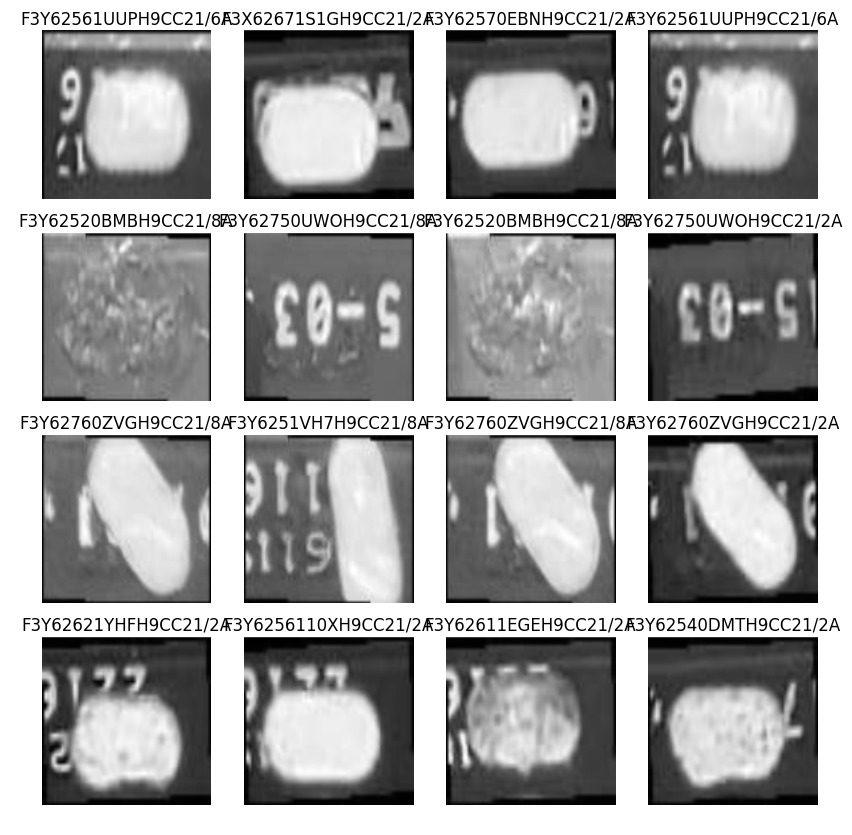

In [18]:
display_tensor(tensors_update, labels_update, sns_update)

In [19]:
from defectlib import GroupKFold_modeling

the label of validation image: 1
the s/n of validation image: set(['F3Y62551RKDH9CC21'])
Train on 501 samples, validate on 39 samples
Epoch 1/10
501/501 [==============================] - 8s - loss: 0.9446 - acc: 0.6188 - val_loss: 0.1865 - val_acc: 1.0000
Epoch 2/10
501/501 [==============================] - 8s - loss: 0.4645 - acc: 0.8104 - val_loss: 0.0425 - val_acc: 1.0000
Epoch 3/10
501/501 [==============================] - 8s - loss: 0.3379 - acc: 0.8822 - val_loss: 0.0254 - val_acc: 1.0000
Epoch 4/10
501/501 [==============================] - 8s - loss: 0.2680 - acc: 0.8922 - val_loss: 0.0130 - val_acc: 1.0000
Epoch 5/10
501/501 [==============================] - 8s - loss: 0.2213 - acc: 0.8942 - val_loss: 0.0147 - val_acc: 1.0000
Epoch 6/10
501/501 [==============================] - 8s - loss: 0.1189 - acc: 0.9621 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 7/10
501/501 [==============================] - 8s - loss: 0.0851 - acc: 0.9741 - val_loss: 0.0172 - val_acc: 1.0000
Epoch

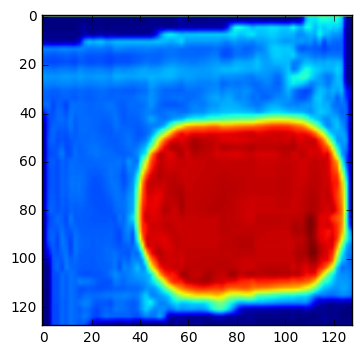

In [21]:
accuracy_dict, logloss_dict, models = GroupKFold_modeling(tensors_update, labels_update, sns_update, nb_classes=4, nb_epoch=10, input_shape=(128, 128))

In [22]:
accuracy_dict

{0: 0.65476190476190466,
 1: 0.96666666666666679,
 2: 0.51724137931034486,
 3: 0.39407407407407408}

In [26]:
test_tensor = tensors_update[labels_update == 0][0]

In [29]:
test_tensor.shape

(128, 128)

In [70]:
test_tensor, test_label = keras_transform(tensors_update[labels_update == 3], labels_update[labels_update == 3])

In [71]:
test_tensor[0].shape

(128, 128, 1)

In [72]:
predict = models[1].predict_classes(test_tensor)

117/117 [==============================] - 0s     


In [73]:
predict

array([3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [103]:
test1 = {'1': 0.8, '2': 0.7, '3': 0.6}
test2 = {'1': 0.5, '2': 0.8, '3': 0.2}
test3 = {'1': 0.1, '2': 0.3, '3': 0.4}

In [104]:
test3

{'1': 0.1, '2': 0.3, '3': 0.4}

In [106]:
for t1, t2, t3 in zip(test1.items(), test2.items(), test3.items()):
    print t1
    print t2
    print t3

('1', 0.8)
('1', 0.5)
('1', 0.1)
('3', 0.6)
('3', 0.2)
('3', 0.4)
('2', 0.7)
('2', 0.8)
('2', 0.3)


In [ ]:
accuracy_dict, logloss_dict, models = GroupKFold_modeling(tensors_update, labels_update, sns_update, nb_classes=4, nb_epoch=10, input_shape=(128, 128))